## 1.	Import Libraries/Dataset 
##      a.	Download the dataset
##      b.	Import the required libraries


In [27]:
import urllib.request
import gzip
import shutil
import os


def dowload_imdb_dataset():
    print("Downloading the required IMDB Dataset from the repository !!!")
    
    if not os.path.exists("Dataset"):
        os.makedirs("Dataset")

    # Example -> https://datasets.imdbws.com/name.basics.tsv.gz
    filename_lists = ["title.basics.tsv.gz", 
                      "title.crew.tsv.gz", 
                      "title.ratings.tsv.gz",
                      "title.akas.tsv.gz",
                      "title.episode.tsv.gz",
                      "title.principals.tsv.gz",
                      "name.basics.tsv.gz"
                     ]
    length = len(filename_lists)
    i = 0
    for file_name in filename_lists:
        i += 1
        url = "https://datasets.imdbws.com/"+ file_name
        urllib.request.urlretrieve(url, "Dataset/"+ file_name)
        percent = round(i/length*100)
        print(f"{percent}% complete, downloading progress. Please wait !!!")
    print("\n Done! Downloading complete \n")


if __name__ == "__main__":
    dowload_imdb_dataset()

14% complete, downloading progress. Please wait !!!
29% complete, downloading progress. Please wait !!!
43% complete, downloading progress. Please wait !!!
57% complete, downloading progress. Please wait !!!
71% complete, downloading progress. Please wait !!!
86% complete, downloading progress. Please wait !!!
100% complete, downloading progress. Please wait !!!

 Done! Downloading complete 



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the file from the tsv.gz formate

In [28]:
title_basic = pd.read_csv("Dataset/title.basics.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
title_ratings = pd.read_csv("Dataset/title.ratings.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
title_akas = pd.read_csv("Dataset/title.akas.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
title_crew = pd.read_csv("Dataset/title.crew.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
title_episode = pd.read_csv("Dataset/title.episode.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
title_principals = pd.read_csv("Dataset/title.principals.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)
name_basics = pd.read_csv("Dataset/name.basics.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"', low_memory=False)

## (a) Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [11]:
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0072308,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0117057,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0060827,tt0050976"


In [13]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1771
1,tt0000002,6.0,225
2,tt0000003,6.5,1526
3,tt0000004,6.1,146
4,tt0000005,6.2,2343


In [35]:
title_basic.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [14]:
title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [17]:
pd.set_option("display.max_columns", None)

In [18]:
temp = pd.merge(title_crew, title_basic, on="tconst")
#temp1 = pd.merge(temp, title_akas, on="tconst")
temp2 = pd.merge(temp, title_episode, on="tconst")
temp3 = pd.merge(temp2, title_principals, on="tconst")
df = pd.merge(temp3, title_ratings, on="tconst")
df.head()

,tconst,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,parentTconst,seasonNumber,episodeNumber,ordering,nconst,category,job,characters,averageRating,numVotes
0,tt0041951,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,tt0041038,1,9,10,nm0156134,producer,producer,\N,7.5,65
1,tt0041951,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,tt0041038,1,9,1,nm0138194,actor,\N,"[""The Lone Ranger""]",7.5,65
2,tt0041951,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,tt0041038,1,9,2,nm0798855,actor,\N,"[""Tonto""]",7.5,65
3,tt0041951,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,tt0041038,1,9,3,nm0071986,actor,\N,"[""Hardrock Jones""]",7.5,65
4,tt0041951,nm0782690,"nm0872077,nm0289014,nm1080563,nm0834503",tvEpisode,The Tenderfeet,The Tenderfeet,0,1949,\N,30,Western,tt0041038,1,9,4,nm0112203,actor,\N,"[""Dick Larrabee""]",7.5,65


In [19]:
df.columns

Index(['tconst', 'directors', 'writers', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'parentTconst', 'seasonNumber', 'episodeNumber', 'ordering',
       'nconst', 'category', 'job', 'characters', 'averageRating', 'numVotes'],
      dtype='object')

<AxesSubplot:>

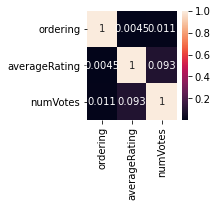

In [64]:
plt.figure(figsize=(2,2))
sns.heatmap(df.corr(), color='c', annot=True)

In [37]:
title_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [38]:
title_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16


In [39]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


## b.	Print the description and shape of the dataset.

In [50]:
name_basics.describe()
name_basics.shape

(11122042, 6)

In [49]:
title_ratings.describe()
title_ratings.shape

(1175177, 3)

In [42]:
title_basic.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,8144398,8144398,8144389,8144389,8144398,8144398,8144398,8144398,8144388
unique,8144398,12,3907959,3926520,9,149,96,849,2288
top,tt11765926,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,5963818,40315,40315,7896398,941968,8064378,5851174,872817


In [43]:
title_akas.describe()

,ordering
count,2.834350e+07
mean,3.970402e+00
std,3.334466e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.640000e+02


## shape of the dataset will return a tuple representing the dimensionality.

In [44]:
title_ratings.shape

(1175177, 3)

In [45]:
name_basics.shape

(11122042, 6)

## Exploratory Data Analysis


In [46]:
title_ratings.corr()

,averageRating,numVotes
averageRating,1.000000,0.012179
numVotes,0.012179,1.000000


In [47]:
name_basics.corr()

""


<AxesSubplot:>

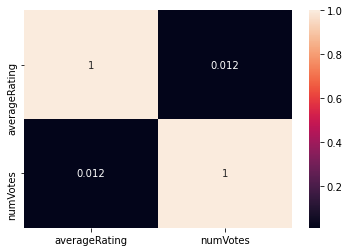

In [48]:
sns.heatmap(title_ratings.corr(), annot=True)

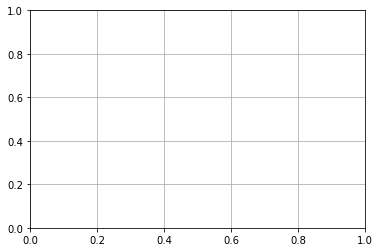

In [51]:
plt.grid()